In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import image as mpimg

In [2]:
def shi_tomasi(org_image, threshold, window_size):
    org_image = np.array(mpimg.imread(org_image))
    plt.figure()
    plt.imshow(org_image)
    plt.show()
    if(len(org_image.shape) == 3):
        image = np.dot(org_image[...,:3], [0.299, 0.587, 0.114])
    else:
        image = org_image
    left_shifted_image = np.concatenate((image[:, 1:], image[:,-1:]), axis=1)
    up_shifted_image = np.concatenate((image[1:, :], image[-1:,:]), axis=0)
    x_change = left_shifted_image-image
    y_change = up_shifted_image-image
    new_image = np.zeros(image.shape)
    m = image.shape[0]
    n = image.shape[1]
    for i in range(window_size//2, m-window_size//2):
        for j in range(window_size//2, n-window_size//2):
            A = np.square(x_change[i-window_size//2:i+window_size//2, j-window_size//2:j+window_size//2]).sum()
            B = np.multiply((x_change[i-window_size//2:i+window_size//2, j-window_size//2:j+window_size//2]),(y_change[i-window_size//2:i+window_size//2, j-window_size//2:j+window_size//2])).sum()
            C = np.square(y_change[i-window_size//2:i+window_size//2, j-window_size//2:j+window_size//2]).sum()
            H = np.array([[A, B], [B, C]])
            min_lambda = np.min(np.linalg.eigvals(H))
            if(min_lambda > threshold):
                if(len(org_image.shape) == 3):
                    org_image[i][j] = [255, 0, 0]
                else:
                    org_image[i][j] = 255
                new_image[i][j] = 255
    return org_image, new_image

In [3]:
def harris_corners(org_image, threshold, window_size, k):
    org_image = np.array(mpimg.imread(org_image))
    plt.figure()
    plt.imshow(org_image)
    plt.show()
    if(len(org_image.shape) == 3):
        image = np.dot(org_image[...,:3], [0.299, 0.587, 0.114])
    else:
        image = org_image
    left_shifted_image = np.concatenate((image[:, 1:], image[:,-1:]), axis=1)
    up_shifted_image = np.concatenate((image[1:, :], image[-1:,:]), axis=0)
    x_change = left_shifted_image-image
    y_change = up_shifted_image-image
    new_image = np.zeros(image.shape)
    m = image.shape[0]
    n = image.shape[1]
    for i in range(window_size//2, m-window_size//2):
        for j in range(window_size//2, n-window_size//2):
            A = np.square(x_change[i-window_size//2:i+window_size//2, j-window_size//2:j+window_size//2]).sum()
            B = np.multiply((x_change[i-window_size//2:i+window_size//2, j-window_size//2:j+window_size//2]),(y_change[i-window_size//2:i+window_size//2, j-window_size//2:j+window_size//2])).sum()
            C = np.square(y_change[i-window_size//2:i+window_size//2, j-window_size//2:j+window_size//2]).sum()
            H = np.array([[A, B], [B, C]])
            f = np.linalg.det(H) - k*np.square(np.trace(H))
            if(f > threshold):
                if(len(org_image.shape) == 3):
                    org_image[i][j] = [255, 0, 0]
                else:
                    org_image[i][j] = 255
                new_image[i][j] = 255
    return org_image, new_image

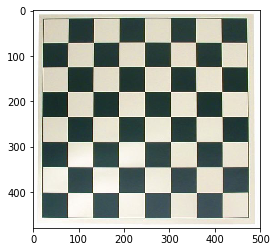

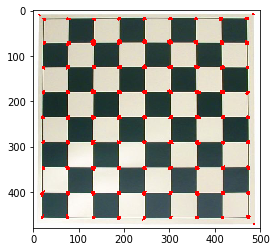

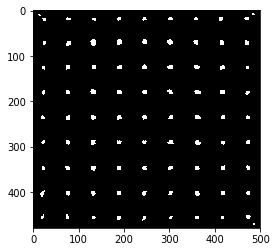

In [4]:
corners_placed, corners = shi_tomasi("chess.jpg", 1000, 7)
plt.figure()
plt.imshow(corners_placed)
plt.show()
plt.figure()
plt.imshow(corners, cmap="gray")
plt.show()

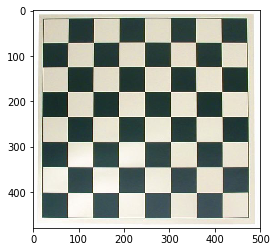

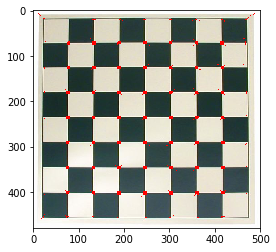

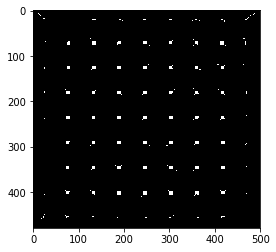

In [5]:
corners_placed, corners = harris_corners("chess.jpg", 2000, 9, 0.24)
plt.figure()
plt.imshow(corners_placed)
plt.show()
plt.figure()
plt.imshow(corners, cmap="gray")
plt.show()

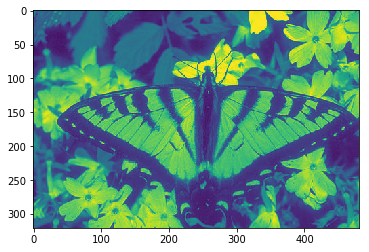

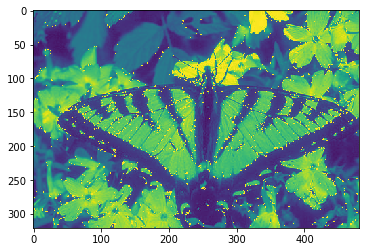

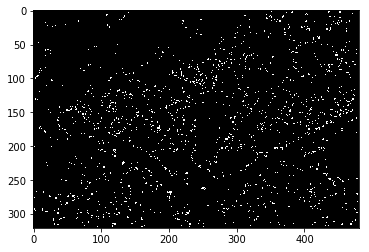

In [6]:
corners_placed, corners = shi_tomasi("Image1.jpg", 100, 3)
plt.figure()
plt.imshow(corners_placed)
plt.show()
plt.figure()
plt.imshow(corners, cmap="gray")
plt.show()

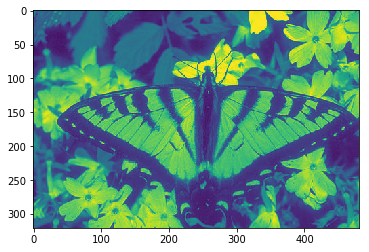

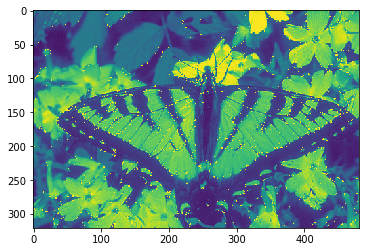

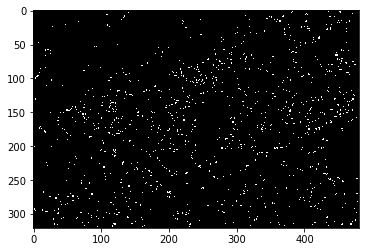

In [7]:
corners_placed, corners = harris_corners("Image1.jpg", 20000, 3, 0.10)
plt.figure()
plt.imshow(corners_placed)
plt.show()
plt.figure()
plt.imshow(corners, cmap="gray")
plt.show()

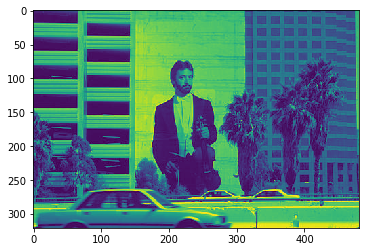

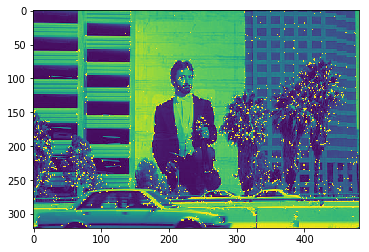

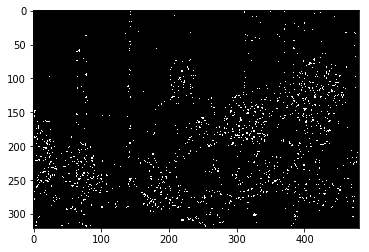

In [8]:
corners_placed, corners = shi_tomasi("Image2.jpg", 100, 3)
plt.figure()
plt.imshow(corners_placed)
plt.show()
plt.figure()
plt.imshow(corners, cmap="gray")
plt.show()

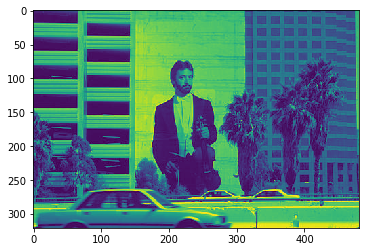

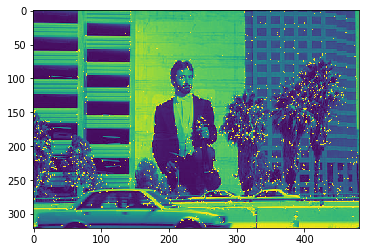

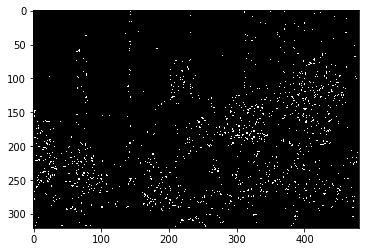

In [9]:
corners_placed, corners = harris_corners("Image2.jpg", 10000, 3, 0.1)
plt.figure()
plt.imshow(corners_placed)
plt.show()
plt.figure()
plt.imshow(corners, cmap="gray")
plt.show()

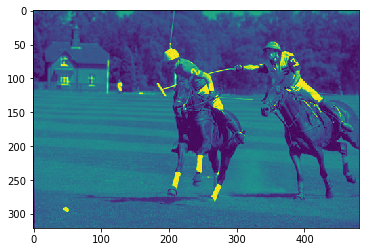

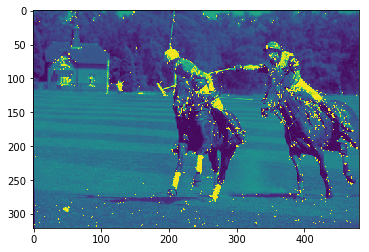

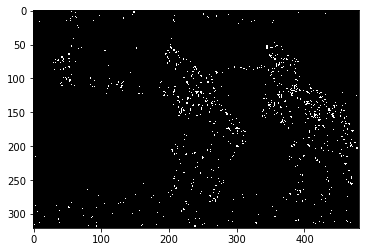

In [10]:
corners_placed, corners = shi_tomasi("Image3.jpg", 100, 3)
plt.figure()
plt.imshow(corners_placed)
plt.show()
plt.figure()
plt.imshow(corners, cmap="gray")
plt.show()

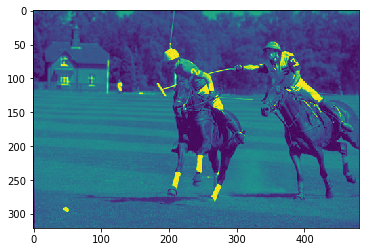

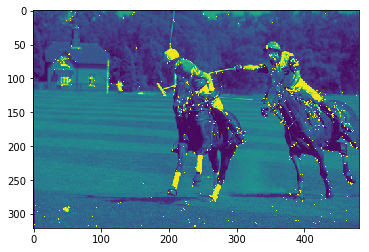

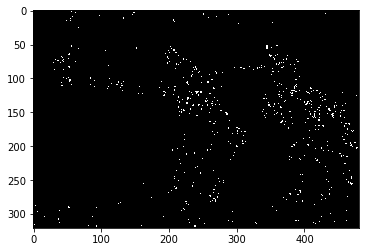

In [11]:
corners_placed, corners = harris_corners("Image3.jpg", 20000, 3, 0.10)
plt.figure()
plt.imshow(corners_placed)
plt.show()
plt.figure()
plt.imshow(corners, cmap="gray")
plt.show()